# References

https://www.kaggle.com/code/pritech/predicting-the-strength-of-concrete/notebook \
https://towardsdatascience.com/how-to-create-custom-scikit-learn-classification-and-regression-models-70db7e76addd \
https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3

# Importing Libraries

In [265]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin 
import random
import math
import warnings
warnings.filterwarnings('ignore')
import itertools as it

# Reading Data

In [266]:
data = pd.read_csv('https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_Train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_test.csv')
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [267]:
# Shape of the data
data.shape

(800, 9)

In [268]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 56.4 KB


The data has no null values so we dont need to drop any of its rows

In [269]:
# Describtion of the data
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,292.533625,67.819125,47.81125,179.77925,5.693500,985.551875,778.426250,49.69625,36.654187
std,103.719988,86.017377,61.53907,22.18845,6.264438,72.783248,82.670454,69.13960,17.623053
min,102.000000,0.000000,0.00000,121.80000,0.000000,801.000000,594.000000,1.00000,2.330000
25%,212.100000,0.000000,0.00000,162.00000,0.000000,938.000000,746.600000,7.00000,23.242500
50%,277.050000,19.000000,0.00000,184.00000,5.250000,974.000000,780.650000,28.00000,35.340000
75%,374.000000,129.800000,117.50000,192.00000,10.200000,1046.925000,839.525000,56.00000,48.880000
max,540.000000,359.400000,174.70000,228.00000,32.200000,1145.000000,992.600000,365.00000,82.600000


# EDA 

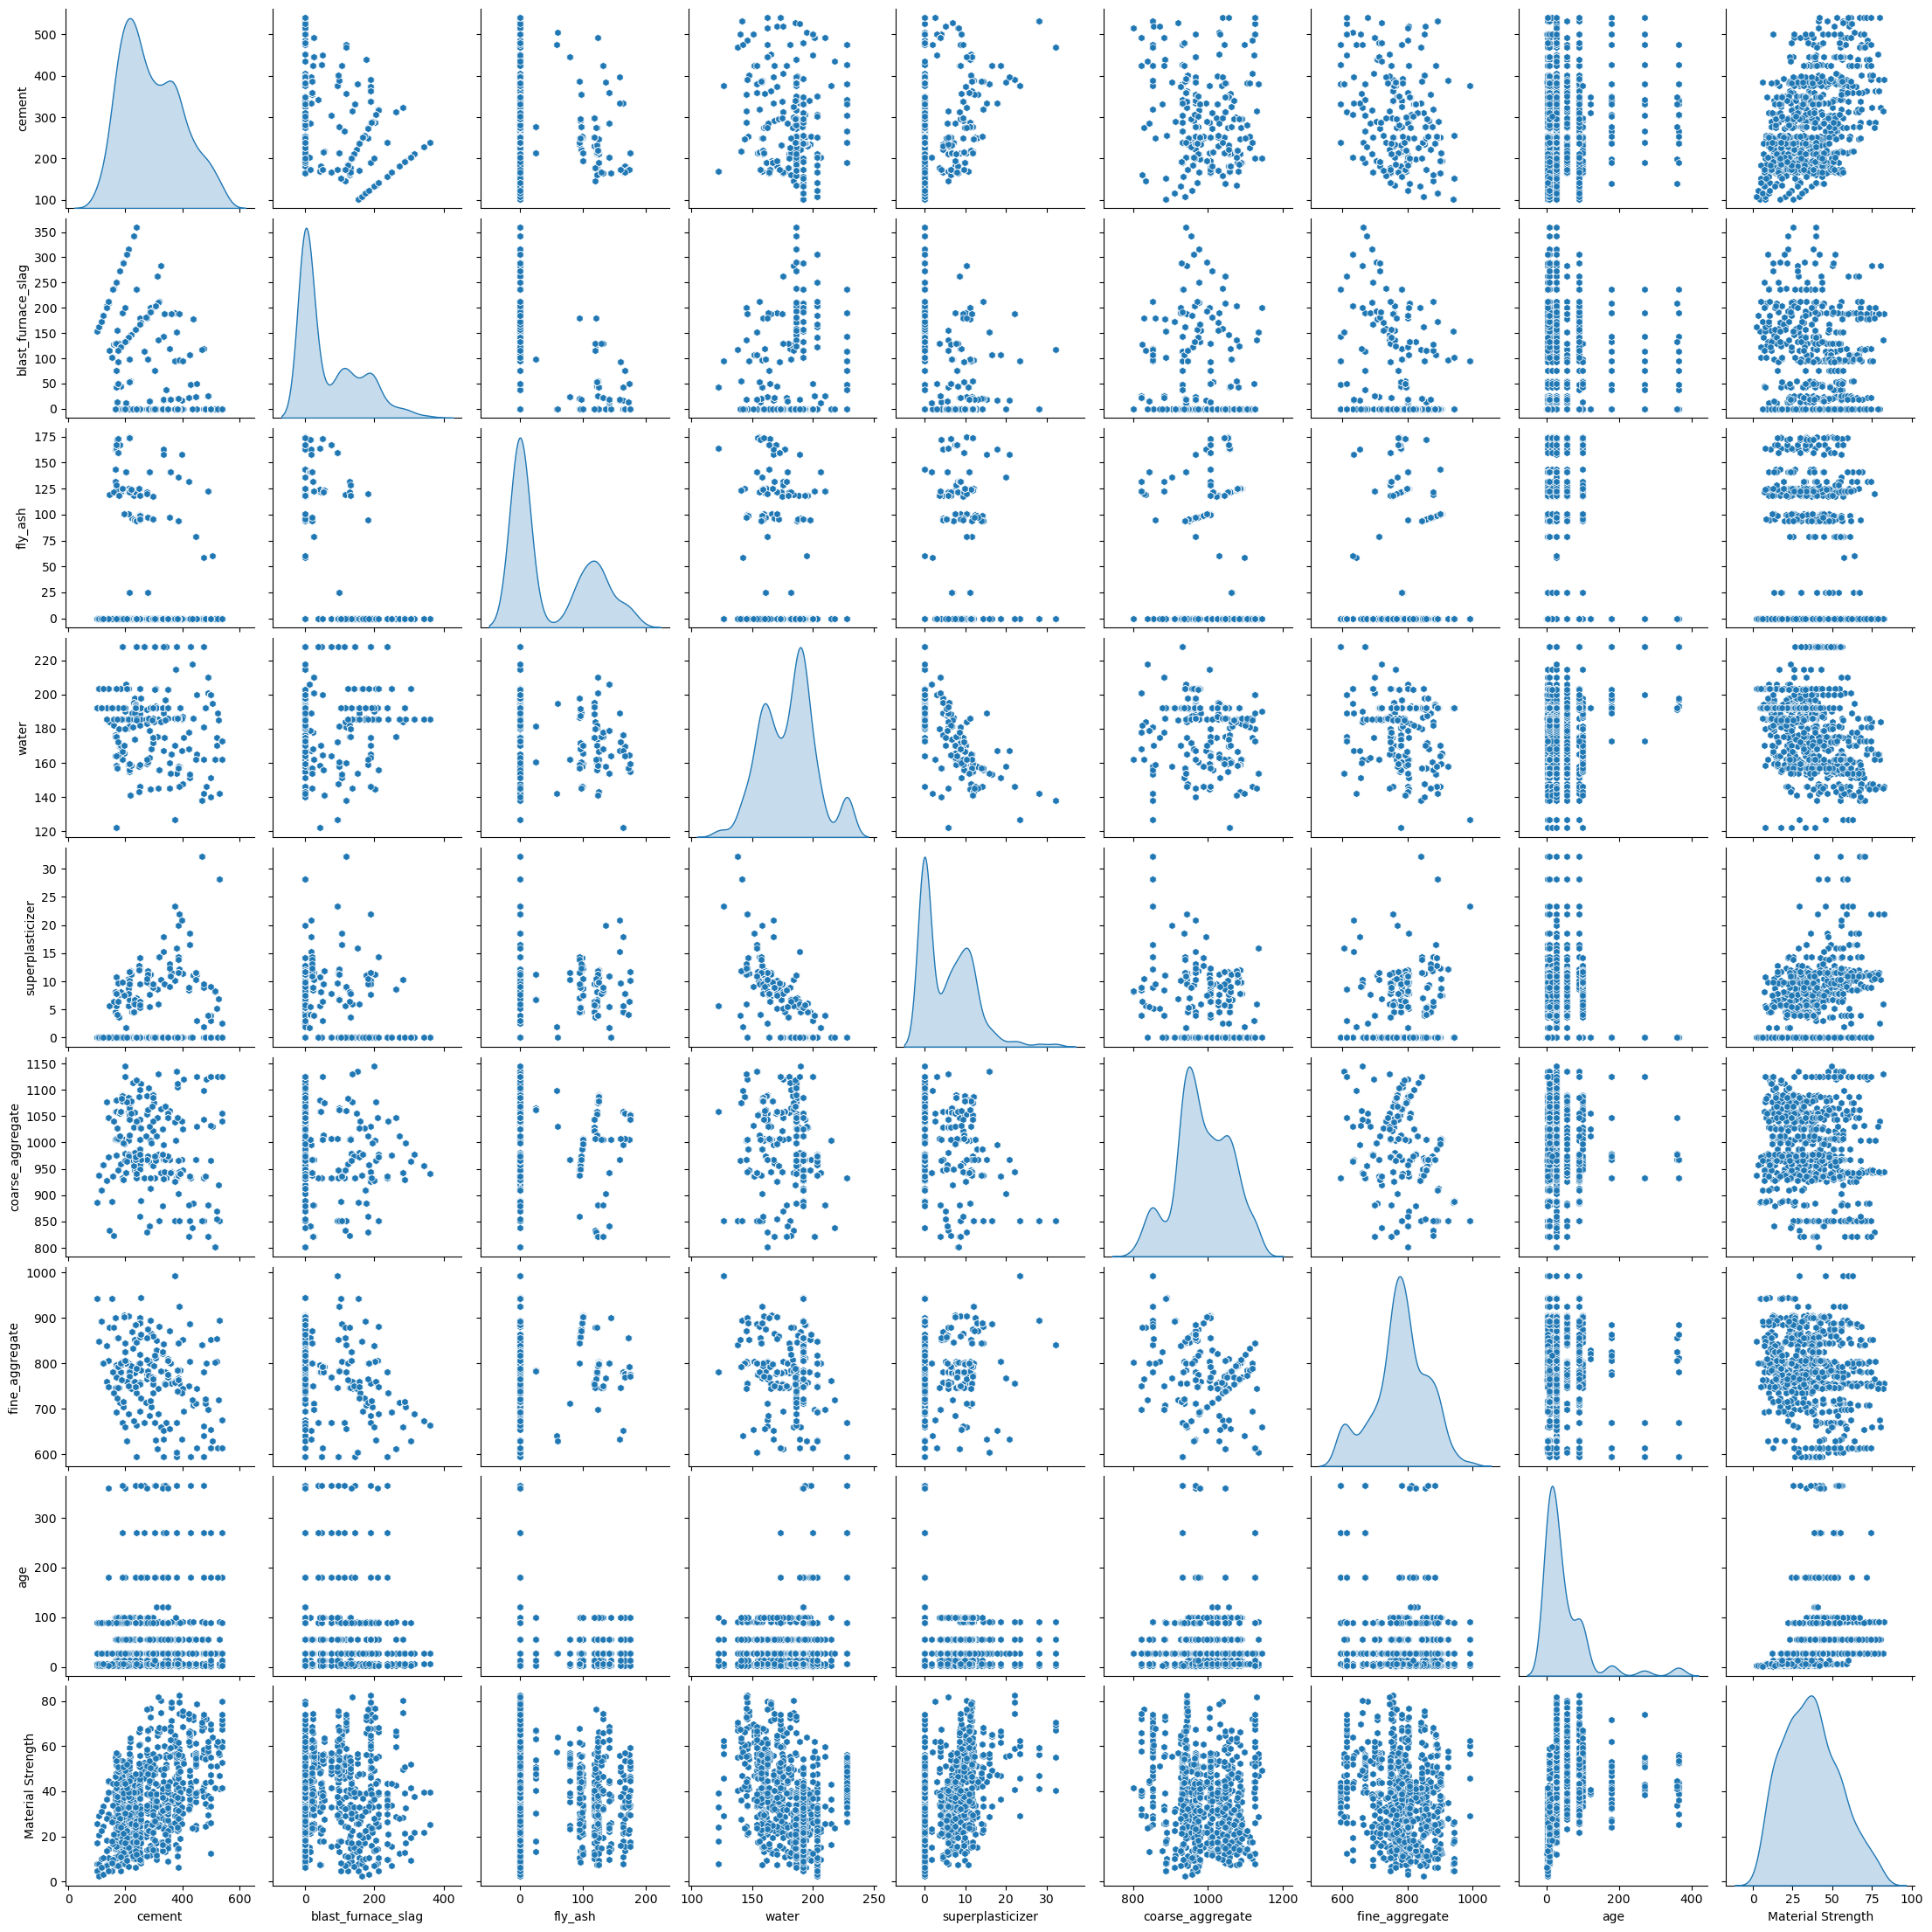

In [270]:
# Pair Plot of the data
sns.pairplot(data,markers="h", diag_kind = 'kde')
plt.show()

<Axes: >

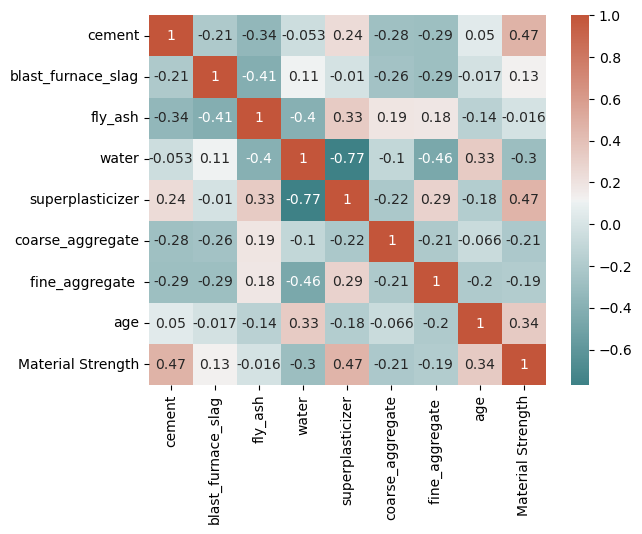

In [271]:
# correlation martix
sns.heatmap(data.corr(), xticklabels=data.columns, yticklabels=data.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

From the above pair plot and correlation matrix we can observe that Cement and Superplasticizer are highly correlated with Material Strength and the remaining features are also correlated among themself but we are ignoring it as the number of number of features is very low

<Axes: >

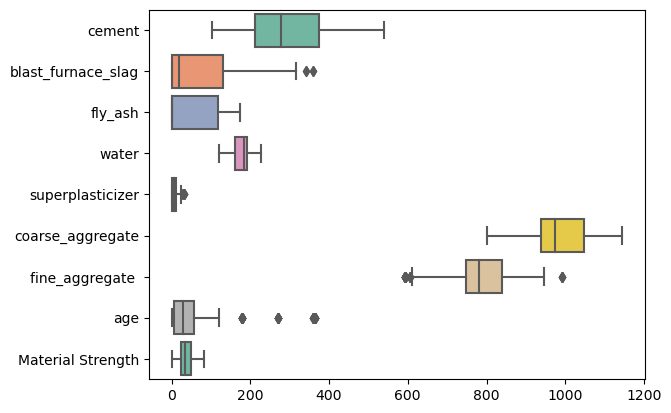

In [272]:
# Box plot to check for any Outliers
sns.boxplot(data=data, orient="h", palette="Set2", dodge=False)

From the box plot it can be seen that blast_furnace_slag , superplasticizer and fine_aggregate has outliers

Text(0.5, 1.0, 'Box Plot')

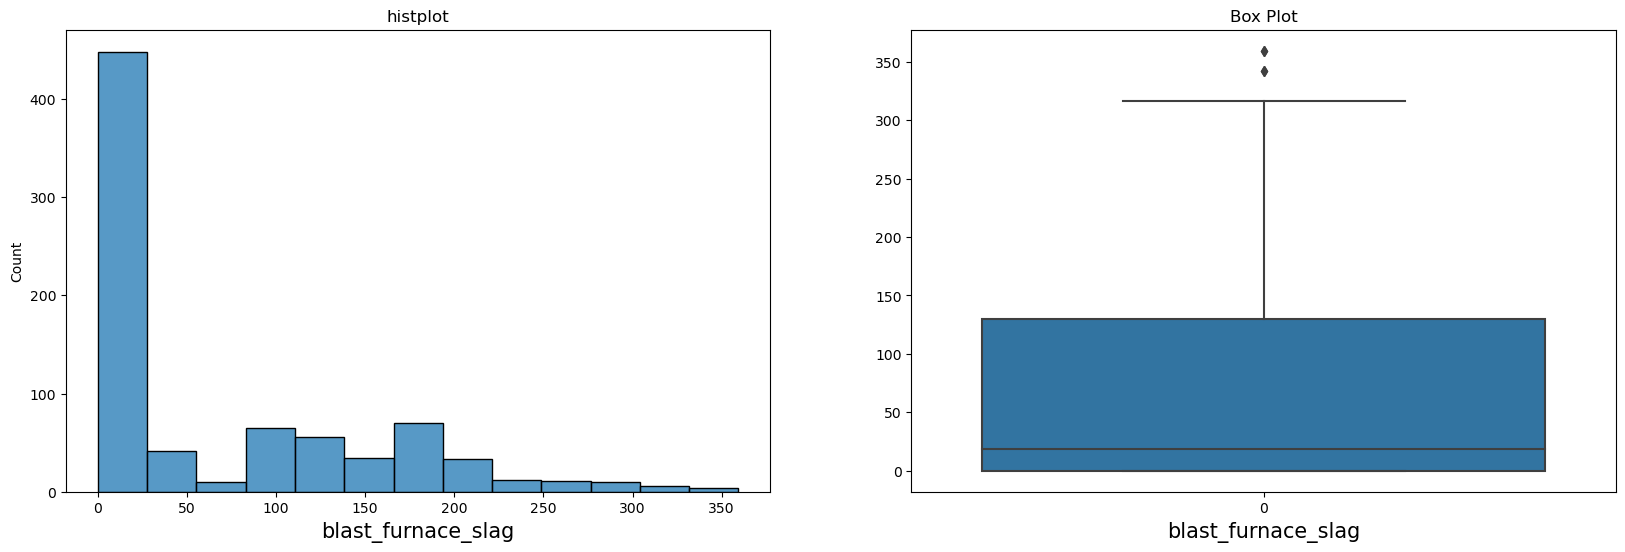

In [273]:
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(data['blast_furnace_slag'],ax=axis1)
axis1.set_xlabel('blast_furnace_slag', fontsize=15)
axis1.set_title("histplot")

sns.boxplot(data['blast_furnace_slag'],ax=axis2)
axis2.set_xlabel('blast_furnace_slag', fontsize=15)
axis2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

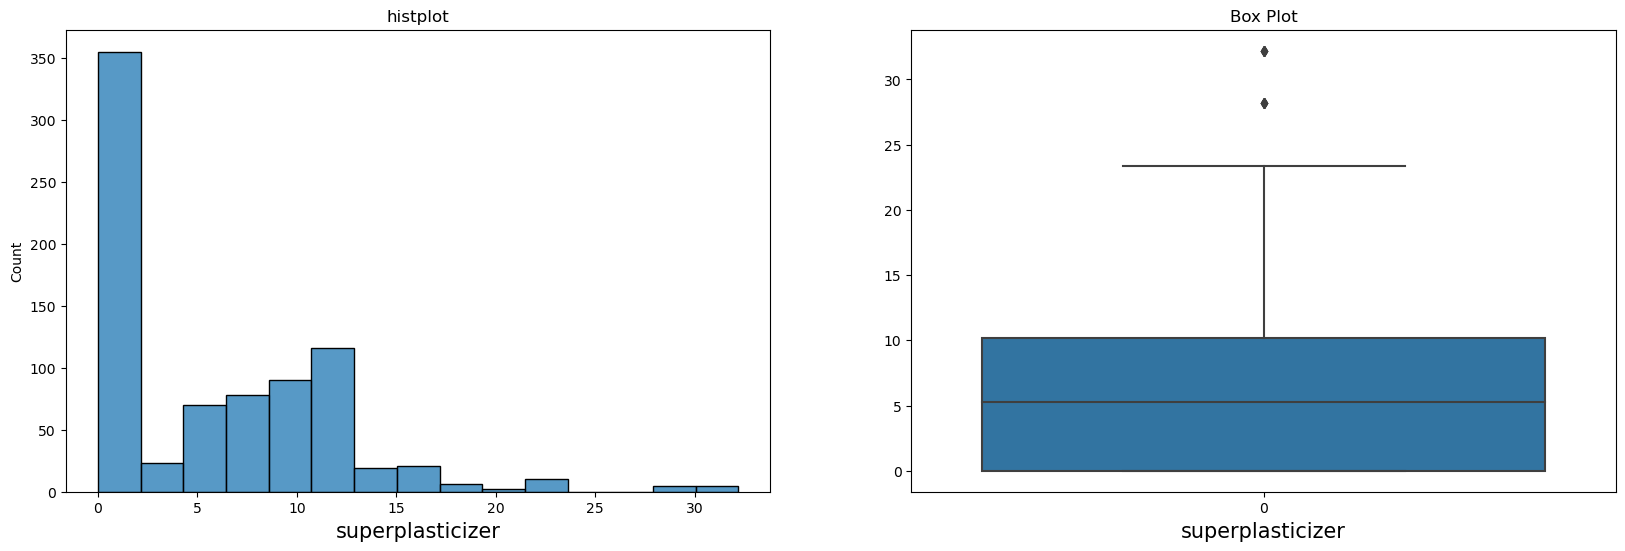

In [274]:
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(data['superplasticizer'],ax=axis1)
axis1.set_xlabel('superplasticizer', fontsize=15)
axis1.set_title("histplot")

sns.boxplot(data['superplasticizer'],ax=axis2)
axis2.set_xlabel('superplasticizer', fontsize=15)
axis2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

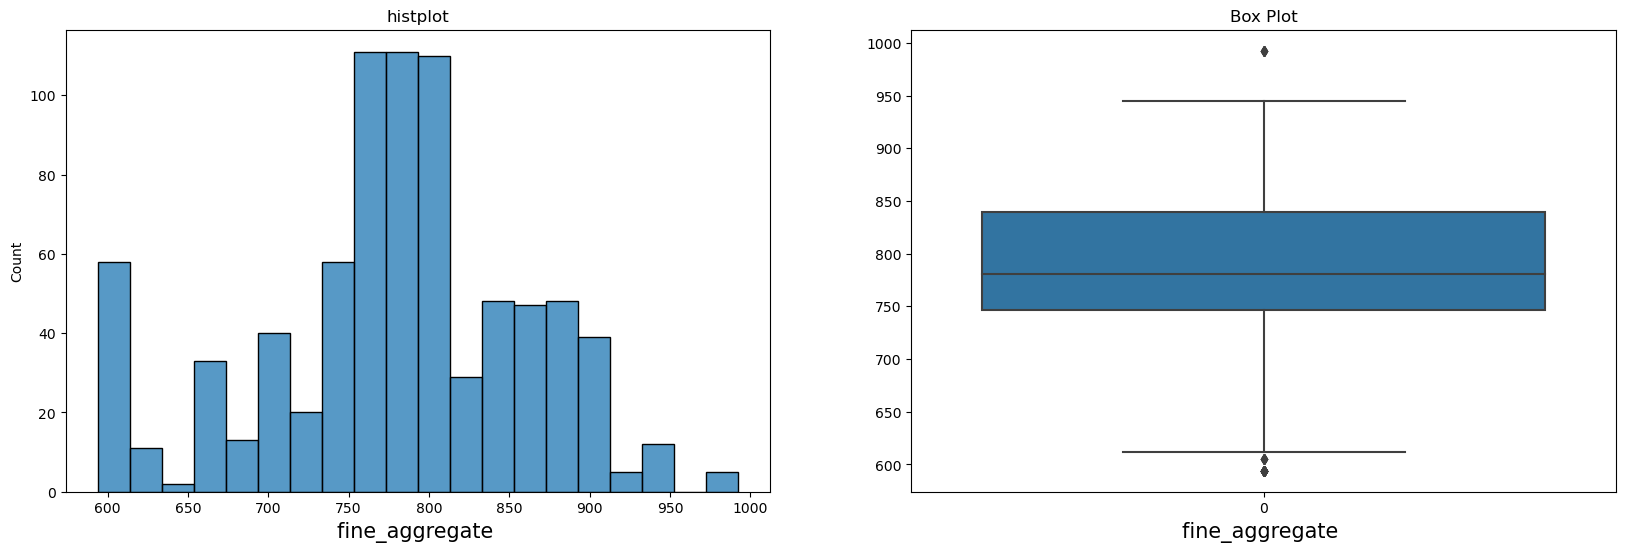

In [275]:
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(data['fine_aggregate '],ax=axis1)
axis1.set_xlabel('fine_aggregate ', fontsize=15)
axis1.set_title("histplot")

sns.boxplot(data['fine_aggregate '],ax=axis2)
axis2.set_xlabel('fine_aggregate ', fontsize=15)
axis2.set_title("Box Plot")

In [276]:
# code from : https://www.kaggle.com/code/pritech/predicting-the-strength-of-concrete/notebook
# Removing Outliers
columns = ['blast_furnace_slag','superplasticizer','fine_aggregate ']
for col in columns:
    Percent_25 = data[col].quantile(0.25)
    Percent_75 = data[col].quantile(0.75)
    # Range of percentiles to be allowed
    low = Percent_25-2.5*(Percent_75-Percent_25)
    high = Percent_75+2.5*(Percent_75-Percent_25)
    # updating data
    data = data[data[col] > low]
    data = data[data[col] < high]

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 62.5 KB


# Feature Engineering

In [278]:
# creating a copy to experiment with attributes
modified_data_1 = data.copy()

### Univariate Features
Lets generate squares, cubes, logs and inverse of all the columns

In [279]:
modified_data_1.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength'],
      dtype='object')

In [280]:
target_1 = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength']

In [281]:
for i in modified_data_1.columns:
    modified_data_1[i+'_sqr'] = modified_data_1[i]**2
    modified_data_1[i+'_cub'] = modified_data_1[i]**3
    modified_data_1[i+'_log'] = np.log(modified_data_1[i])
    modified_data_1[i+'_inv'] = 1/modified_data_1[i]

In [282]:
modified_data_1.shape

(800, 45)

Data cleaning:\
Removing columns containing nan and inf values

In [283]:
# Replacing all the inf values with nan
modified_data_1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [284]:
# Dropping all the nan values
modified_data_1 = modified_data_1.dropna(axis=1)

In [285]:
modified_data_1.shape

(800, 39)

In [286]:
# Dropping 'Material Strength_sqr', 'Material Strength_cub','Material Strength_log', 'Material Strength_inv' as we dont need them
modified_data_1= modified_data_1.drop(['Material Strength_sqr', 'Material Strength_cub',
       'Material Strength_log', 'Material Strength_inv'],axis =1)

In [287]:
modified_data_1.shape

(800, 35)

In [288]:
corr_1 = modified_data_1.corr()

In [289]:
corr_1['Material Strength'].abs().sort_values(ascending=False)

Material Strength         1.000000
age_log                   0.599550
age_inv                   0.565016
cement                    0.470882
superplasticizer          0.466865
cement_sqr                0.464795
cement_log                0.462439
cement_cub                0.448637
cement_inv                0.436245
superplasticizer_sqr      0.381175
age                       0.339825
water_inv                 0.327655
water_log                 0.316054
water                     0.298688
superplasticizer_cub      0.279852
water_sqr                 0.276512
water_cub                 0.250650
coarse_aggregate_inv      0.227406
coarse_aggregate_log      0.221240
coarse_aggregate          0.214502
coarse_aggregate_sqr      0.207280
coarse_aggregate_cub      0.199669
fine_aggregate _inv       0.193516
fine_aggregate _log       0.191594
fine_aggregate            0.188004
fine_aggregate _sqr       0.182862
fine_aggregate _cub       0.176369
age_sqr                   0.160808
blast_furnace_slag  

<Axes: title={'center': 'Correlation'}>

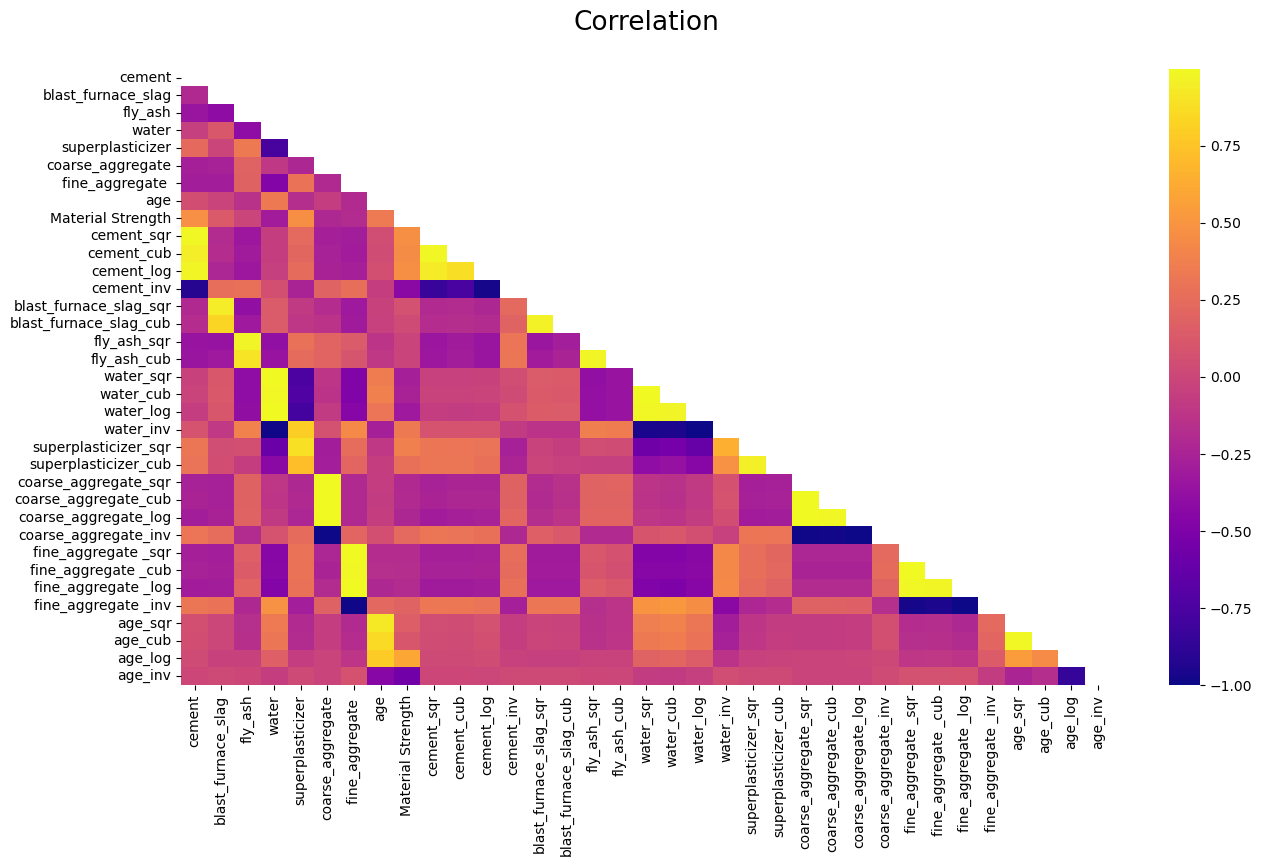

In [291]:
plot = np.zeros_like(corr_1, dtype=bool)
plot[np.triu_indices_from(plot)] = True
plt.figure(figsize=(15,8))
plt.title('Correlation', y=1.05, size=19)
sns.heatmap(corr_1,vmin=-1, cmap='plasma',annot=False,  mask=mask, fmt='.2f')

From the above plot we can see that features are not highly correlated among themselves so we need not remove any column

### Statistical Analysis

In [292]:
analysis_features_1 = modified_data_1.drop('Material Strength',axis = 1)
analysis_values_1 = modified_data_1['Material Strength'].copy()
analysis_features_1 = sm.add_constant(analysis_features_1)

model_1 = sm.OLS(analysis_values_1, analysis_features_1).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:59:02   Log-Likelihood:                -2537.0
No. Observations:                 800   AIC:                             5136.
Df Residuals:                     769   BIC:                             5281.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2539

In [293]:
# Removing all the columns with p value greater than 0.05
modified_data_2=modified_data_1[model_1.pvalues[model_1.pvalues < 0.05].index].copy()
modified_data_2['Material Strength'] = modified_data_1['Material Strength']

In [294]:
model_1.pvalues[model_1.pvalues > 0.05].index

Index(['const', 'fly_ash', 'coarse_aggregate', 'age', 'blast_furnace_slag_sqr',
       'blast_furnace_slag_cub', 'fly_ash_sqr', 'fly_ash_cub', 'water_cub',
       'water_inv', 'coarse_aggregate_sqr', 'coarse_aggregate_cub',
       'coarse_aggregate_log', 'coarse_aggregate_inv', 'fine_aggregate _sqr',
       'fine_aggregate _cub', 'fine_aggregate _inv', 'age_sqr', 'age_cub',
       'age_inv'],
      dtype='object')

### Bivariate Features
Lets produce more features by multiplying any two features

In [295]:
modified_data_3 = modified_data_2.copy()
analysis_features_2 = modified_data_3.drop('Material Strength',axis = 1)
analysis_values_2 = modified_data_3['Material Strength'].copy()

In [296]:
combinations = it.combinations(analysis_features_2.columns, 2)

In [297]:
# For creating various combinations
for i in combinations:
    analysis_features_2[i[0]+"*"+i[1]] = analysis_features_2[i[0]] * analysis_features_2[i[1]]

In [298]:
analysis_features_2.shape

(800, 120)

In [299]:
analysis_features_2 = analysis_features_2.dropna(axis=1)

In [300]:
analysis_features_2.shape

(800, 120)

In [301]:

analysis_features_2 = sm.add_constant(analysis_features_2)

model_2 = sm.OLS(analysis_values_2, analysis_features_2).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:59:24   Log-Likelihood:                -2357.8
No. Observations:                 800   AIC:                             4860.
Df Residuals:                     728   BIC:                             5197.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [302]:
# Removing all the columns with p value greater than 0.05
modified_data_4=analysis_features_2[model_2.pvalues[model_2.pvalues < 0.05].index[1:]].copy()
modified_data_4['Material Strength'] = modified_data_3['Material Strength']
modified_data_4.shape

(800, 55)

In [303]:
model_2.pvalues[model_2.pvalues > 0.05].index

Index(['const', 'blast_furnace_slag', 'fine_aggregate ', 'cement_sqr',
       'cement_cub', 'water_sqr', 'superplasticizer_cub', 'cement*water',
       'cement*superplasticizer', 'cement*fine_aggregate ',
       'cement*cement_sqr', 'cement*cement_cub', 'cement*water_sqr',
       'cement*superplasticizer_sqr', 'cement*superplasticizer_cub',
       'cement*age_log', 'blast_furnace_slag*superplasticizer',
       'blast_furnace_slag*cement_inv',
       'blast_furnace_slag*superplasticizer_sqr',
       'blast_furnace_slag*superplasticizer_cub', 'water*superplasticizer',
       'water*fine_aggregate ', 'water*cement_sqr', 'water*cement_cub',
       'water*cement_log', 'water*water_sqr', 'water*superplasticizer_sqr',
       'water*superplasticizer_cub', 'water*fine_aggregate _log',
       'superplasticizer*cement_sqr', 'superplasticizer*cement_cub',
       'superplasticizer*cement_log', 'superplasticizer*water_sqr',
       'superplasticizer*superplasticizer_sqr',
       'superplasticizer*fin

In [304]:
# Checking for Multicollinarity
corr_2 = modified_data_4.corr()

<Axes: title={'center': 'Correlation of Attributes'}>

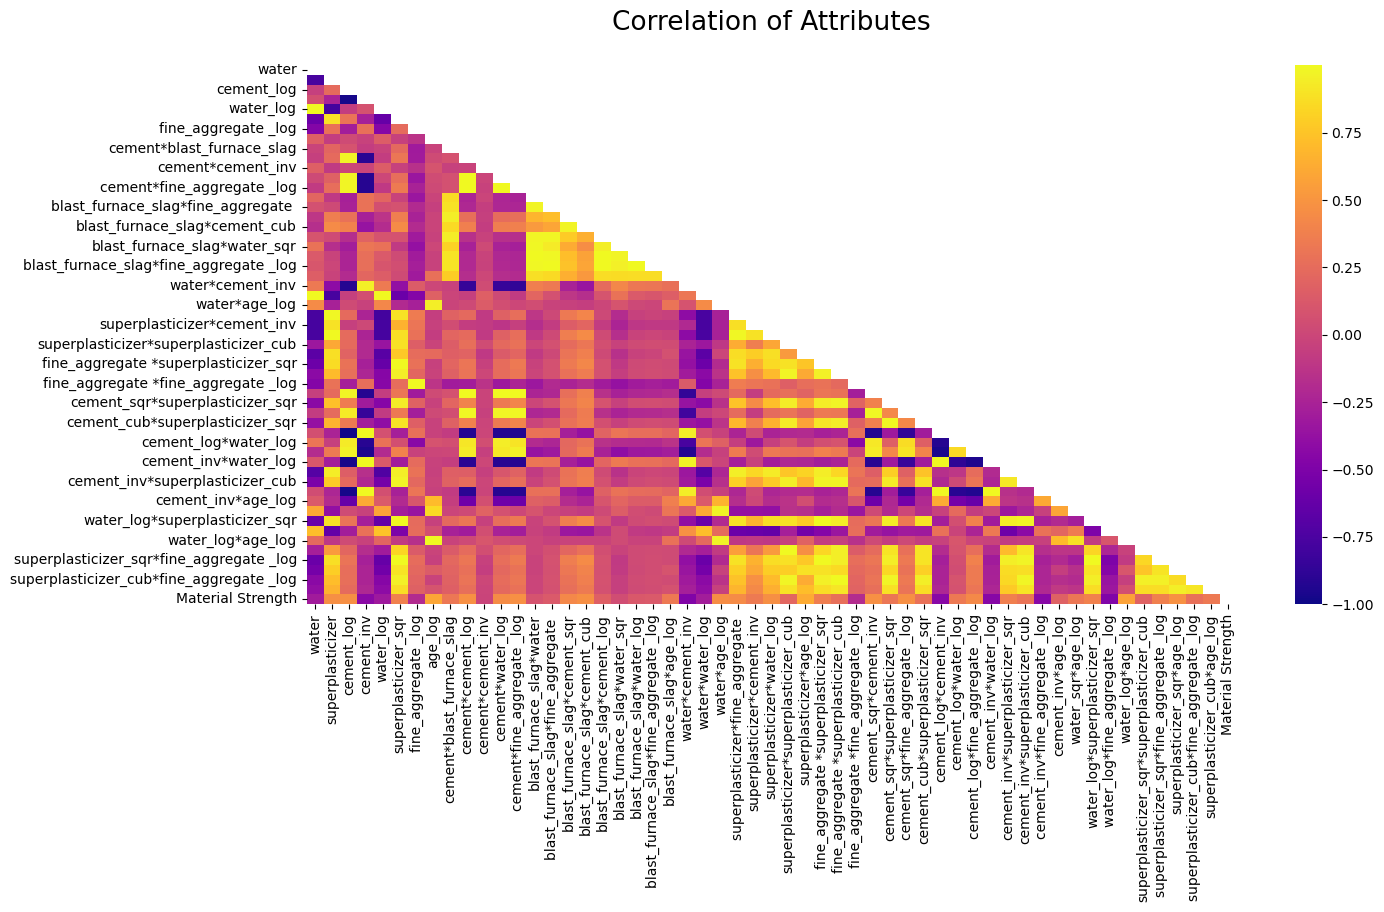

In [305]:
mask = np.zeros_like(corr_2, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(corr_2,vmin=-1, cmap='plasma',annot=False,  mask=mask, fmt='.2f')

In [306]:
# Finding features which are highly correlated among themself and among those two we are removing the one with least correlation 
# with the Material Strength
scope_features = modified_data_4.drop('Material Strength',axis = 1)
scope_values = modified_data_4['Material Strength'].copy()
combinations = it.combinations(scope_features.columns, 2)
columns_to_remove = set()
for i in combinations:
    if(abs(corr_2[i[0]][i[1]]) > 0.8):
        if(abs(corr_2['Material Strength'][i[0]]) > abs(corr_2['Material Strength'][i[1]])):
            columns_to_remove.add(i[1])
        else:
            columns_to_remove.add(i[0])

In [307]:
for i in columns_to_remove:
    modified_data_4 = modified_data_4.drop(i,axis = 1)

In [308]:
modified_data_4.shape

(800, 11)

In [309]:
columns_to_remove

{'blast_furnace_slag*cement_log',
 'blast_furnace_slag*cement_sqr',
 'blast_furnace_slag*fine_aggregate ',
 'blast_furnace_slag*fine_aggregate _log',
 'blast_furnace_slag*water',
 'blast_furnace_slag*water_log',
 'blast_furnace_slag*water_sqr',
 'cement*blast_furnace_slag',
 'cement*cement_log',
 'cement*fine_aggregate _log',
 'cement*water_log',
 'cement_cub*superplasticizer_sqr',
 'cement_inv',
 'cement_inv*fine_aggregate _log',
 'cement_inv*superplasticizer_cub',
 'cement_inv*superplasticizer_sqr',
 'cement_inv*water_log',
 'cement_log',
 'cement_log*cement_inv',
 'cement_log*fine_aggregate _log',
 'cement_log*water_log',
 'cement_sqr*cement_inv',
 'cement_sqr*fine_aggregate _log',
 'cement_sqr*superplasticizer_sqr',
 'fine_aggregate *fine_aggregate _log',
 'fine_aggregate *superplasticizer_cub',
 'fine_aggregate *superplasticizer_sqr',
 'superplasticizer',
 'superplasticizer*cement_inv',
 'superplasticizer*fine_aggregate ',
 'superplasticizer*superplasticizer_cub',
 'superplasticiz

### Bivariate Features with the input data

In [310]:
modified_data_5 = data.copy()
analysis_features_3= modified_data_5.drop('Material Strength',axis = 1)
analysis_values_3= modified_data_5['Material Strength'].copy()
combinations_2 = it.combinations(analysis_features_3.columns, 2)
for i in combinations_2:
    analysis_features_3[i[0]+"*"+i[1]] = analysis_features_3[i[0]] * analysis_features_3[i[1]]
analysis_features_3.replace([np.inf, -np.inf], np.nan, inplace=True)
analysis_features_3 = analysis_features_3.dropna(axis=1)

In [311]:
analysis_features_3 = sm.add_constant(analysis_features_3)

model_3= sm.OLS(analysis_values_3, analysis_features_3).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     71.53
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          1.18e-217
Time:                        22:59:43   Log-Likelihood:                -2839.7
No. Observations:                 800   AIC:                             5753.
Df Residuals:                     763   BIC:                             5927.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [312]:
# Removing all the columns with p value greater than 0.05
modified_data_6=analysis_features_3[model_3.pvalues[model_3.pvalues < 0.05].index[1:]].copy()
modified_data_6['Material Strength'] = modified_data_5['Material Strength']

In [313]:
model_3.pvalues[model_3.pvalues > 0.05].index

Index(['fly_ash', 'fine_aggregate ', 'age', 'cement*blast_furnace_slag',
       'cement*fly_ash', 'cement*coarse_aggregate', 'cement*fine_aggregate ',
       'blast_furnace_slag*coarse_aggregate', 'fly_ash*coarse_aggregate',
       'fly_ash*fine_aggregate ', 'water*superplasticizer', 'water*age',
       'superplasticizer*age', 'coarse_aggregate*fine_aggregate ',
       'coarse_aggregate*age'],
      dtype='object')

# Prepipeline

In [314]:
# To Remove Outliers
class outliers(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        columns = ['blast_furnace_slag','superplasticizer','fine_aggregate ']
        for col in columns:
            Percent_25 = data[col].quantile(0.25)
            Percent_75 = data[col].quantile(0.75)
            # Range of percentiles to be allowed
            low = Percent_25-3*(Percent_75-Percent_25)
            high = Percent_75+3*(Percent_75-Percent_25)
            # updating data
            X = X[X[col] > low]
            X = X[X[col] < high]
        return X

In [315]:
# Univariate features
class Univariate_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        for i in X.columns:
            X[i+'_sqr'] = X[i]**2
            X[i+'_cub'] = X[i]**3
            X[i+'_log'] = np.log(X[i])
            X[i+'_inv'] = 1/X[i]
        return X

In [316]:
# Dropping nan,inf values
class Drop_na(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X.replace([np.inf, -np.inf], np.nan, inplace=True)
        X = X.dropna(axis=1)
        return X

In [317]:
# Bivariate features
class Bivariate_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        combinations = it.combinations(X.columns, 2)
        for i in combinations:
            X[i[0]+"*"+i[1]] = X[i[0]] * X[i[1]]
        return X

In [318]:
# Dropping columns with High P-value
class drop_high_p_value_univariate(BaseEstimator, TransformerMixin):
    def __init__(self,columns=['fly_ash', 'coarse_aggregate', 'age', 'blast_furnace_slag_sqr',
       'blast_furnace_slag_cub', 'fly_ash_sqr', 'fly_ash_cub', 'water_cub',
       'water_inv', 'coarse_aggregate_sqr', 'coarse_aggregate_cub',
       'coarse_aggregate_log', 'coarse_aggregate_inv', 'fine_aggregate _sqr',
       'fine_aggregate _cub', 'fine_aggregate _inv', 'age_sqr', 'age_cub',
       'age_inv']):
        self.columns = columns
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        for col in self.columns:
            X = X.drop(col, axis=1)
        return X

In [319]:
# Dropping columns with High P-value
class drop_high_p_value_Bivariate_1(BaseEstimator, TransformerMixin):
    def __init__(self,columns=['blast_furnace_slag', 'fine_aggregate ', 'cement_sqr',
       'cement_cub', 'water_sqr', 'superplasticizer_cub', 'cement*water',
       'cement*superplasticizer', 'cement*fine_aggregate ',
       'cement*cement_sqr', 'cement*cement_cub', 'cement*water_sqr',
       'cement*superplasticizer_sqr', 'cement*superplasticizer_cub',
       'cement*age_log', 'blast_furnace_slag*superplasticizer',
       'blast_furnace_slag*cement_inv',
       'blast_furnace_slag*superplasticizer_sqr',
       'blast_furnace_slag*superplasticizer_cub', 'water*superplasticizer',
       'water*fine_aggregate ', 'water*cement_sqr', 'water*cement_cub',
       'water*cement_log', 'water*water_sqr', 'water*superplasticizer_sqr',
       'water*superplasticizer_cub', 'water*fine_aggregate _log',
       'superplasticizer*cement_sqr', 'superplasticizer*cement_cub',
       'superplasticizer*cement_log', 'superplasticizer*water_sqr',
       'superplasticizer*superplasticizer_sqr',
       'superplasticizer*fine_aggregate _log', 'fine_aggregate *cement_sqr',
       'fine_aggregate *cement_cub', 'fine_aggregate *cement_log',
       'fine_aggregate *cement_inv', 'fine_aggregate *water_sqr',
       'fine_aggregate *water_log', 'fine_aggregate *age_log',
       'cement_sqr*cement_cub', 'cement_sqr*cement_log',
       'cement_sqr*water_sqr', 'cement_sqr*water_log',
       'cement_sqr*superplasticizer_cub', 'cement_sqr*age_log',
       'cement_cub*cement_log', 'cement_cub*cement_inv',
       'cement_cub*water_sqr', 'cement_cub*water_log',
       'cement_cub*superplasticizer_cub', 'cement_cub*fine_aggregate _log',
       'cement_cub*age_log', 'cement_log*water_sqr',
       'cement_log*superplasticizer_sqr', 'cement_log*superplasticizer_cub',
       'cement_log*age_log', 'cement_inv*water_sqr', 'water_sqr*water_log',
       'water_sqr*superplasticizer_sqr', 'water_sqr*superplasticizer_cub',
       'water_sqr*fine_aggregate _log', 'water_log*superplasticizer_cub',
       'fine_aggregate _log*age_log']):
        self.columns = columns
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        for col in self.columns:
            X = X.drop(col, axis=1)
        return X

In [320]:
# Dropping columns with high multicollenarity
class drop_Multicollinearity(BaseEstimator, TransformerMixin):
    def __init__(self,columns = ['blast_furnace_slag*cement_log',
 'blast_furnace_slag*cement_sqr',
 'blast_furnace_slag*fine_aggregate ',
 'blast_furnace_slag*fine_aggregate _log',
 'blast_furnace_slag*water',
 'blast_furnace_slag*water_log',
 'blast_furnace_slag*water_sqr',
 'cement*blast_furnace_slag',
 'cement*cement_log',
 'cement*fine_aggregate _log',
 'cement*water_log',
 'cement_cub*superplasticizer_sqr',
 'cement_inv',
 'cement_inv*fine_aggregate _log',
 'cement_inv*superplasticizer_cub',
 'cement_inv*superplasticizer_sqr',
 'cement_inv*water_log',
 'cement_log',
 'cement_log*cement_inv',
 'cement_log*fine_aggregate _log',
 'cement_log*water_log',
 'cement_sqr*cement_inv',
 'cement_sqr*fine_aggregate _log',
 'cement_sqr*superplasticizer_sqr',
 'fine_aggregate *fine_aggregate _log',
 'fine_aggregate *superplasticizer_cub',
 'fine_aggregate *superplasticizer_sqr',
 'superplasticizer',
 'superplasticizer*cement_inv',
 'superplasticizer*fine_aggregate ',
 'superplasticizer*superplasticizer_cub',
 'superplasticizer*water_log',
 'superplasticizer_cub*age_log',
 'superplasticizer_cub*fine_aggregate _log',
 'superplasticizer_sqr',
 'superplasticizer_sqr*age_log',
 'superplasticizer_sqr*fine_aggregate _log',
 'superplasticizer_sqr*superplasticizer_cub',
 'water',
 'water*age_log',
 'water*water_log',
 'water_log*age_log',
 'water_log*superplasticizer_sqr',
 'water_sqr*age_log']):
        self.columns = columns
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        for col in self.columns:
            X = X.drop(col, axis=1)
        return X

In [321]:
# Dropping columns with High P-value
class drop_high_p_value_Bivariate_2(BaseEstimator, TransformerMixin):
    def __init__(self,columns=['fly_ash', 'fine_aggregate ', 'age', 'cement*blast_furnace_slag',
       'cement*fly_ash', 'cement*coarse_aggregate', 'cement*fine_aggregate ',
       'blast_furnace_slag*coarse_aggregate', 'fly_ash*coarse_aggregate',
       'fly_ash*fine_aggregate ', 'water*superplasticizer', 'water*age',
       'superplasticizer*age', 'coarse_aggregate*fine_aggregate ',
       'coarse_aggregate*age']):
        self.columns = columns
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        for col in self.columns:
            X = X.drop(col, axis=1)
        return X

In [322]:
# creating 3 dataframe objects to test the three different pipelines 
data_1 = data.copy()
data_2 = data.copy()
data_3 = data.copy()

In [323]:
# Train-Test split for data_1
train_set_1, test_set_1 = train_test_split(data_1, test_size=0.2, shuffle=True, random_state=45)
train_set_1.reset_index(inplace=True)
test_set_1.reset_index(inplace=True)
train_set_1 = train_set_1.drop('index',axis=1)
test_set_1 = test_set_1.drop('index',axis=1)

# Train-Test split for data_2
train_set_2, test_set_2 = train_test_split(data_2, test_size=0.2, shuffle=True, random_state=45)
train_set_2.reset_index(inplace=True)
test_set_2.reset_index(inplace=True)
train_set_2 = train_set_2.drop('index',axis=1)
test_set_2 = test_set_2.drop('index',axis=1)

# Train-Test split for data_3
train_set_3, test_set_3 = train_test_split(data_3, test_size=0.2, shuffle=True, random_state=45)
train_set_3.reset_index(inplace=True)
test_set_3.reset_index(inplace=True)
train_set_3 = train_set_3.drop('index',axis=1)
test_set_3 = test_set_3.drop('index',axis=1)

### Data Preprocessing using sklearn

In [324]:
pre_pipeline_1 = Pipeline([
    ('Outliers_1',outliers()),
    ('Univariate_features_1',Univariate_features()),
    ('Drop_na_1',Drop_na()),
    ('drop_high_p_value_univariate',drop_high_p_value_univariate()),
    ('StandardScaler_1', StandardScaler())
])

In [325]:
pre_pipeline_2 = Pipeline([
    ('Outliers_2',outliers()),
    ('Univariate_features_2',Univariate_features()),
    ('Drop_na_2',Drop_na()),
    ('drop_high_p_value_univariate',drop_high_p_value_univariate()),
    ('Bivariate_features_2',Bivariate_features()),
    ('drop_high_p_value_Bivariate_1',drop_high_p_value_Bivariate_1()),
    ('drop_Multicollinearity',drop_Multicollinearity()),
    ('StandardScaler_2', StandardScaler())
])

In [326]:
pre_pipeline_3 = Pipeline([
    ('Outliers_3',outliers()),
    ('Bivariate_features_3',Bivariate_features()),
    ('Drop_na_3',Drop_na()),
    ('drop_high_p_value_Bivariate_2',drop_high_p_value_Bivariate_2()),
    ('StandardScaler_3', StandardScaler())
])

In [327]:
# Preparing training data_1
train_features_1 = train_set_1.drop("Material Strength", axis=1)
train_labels_1 = train_set_1["Material Strength"].copy()
train_prepared_1 = pre_pipeline_1.fit_transform(train_features_1)
train_labels_1 = np.array(train_labels_1)

# Preparing training data_2
train_features_2 = train_set_2.drop("Material Strength", axis=1)
train_labels_2 = train_set_2["Material Strength"].copy()
train_prepared_2 = pre_pipeline_2.fit_transform(train_features_2)
train_labels_2 = np.array(train_labels_2)


# Preparing training data_3
train_features_3 = train_set_3.drop("Material Strength", axis=1)
train_labels_3 = train_set_3["Material Strength"].copy()
train_prepared_3 = pre_pipeline_3.fit_transform(train_features_3)
train_labels_3 = np.array(train_labels_3)

# Preparing testing data_1
test_features_1 = test_set_1.drop("Material Strength", axis=1)
test_labels_1 = test_set_1["Material Strength"].copy()
test_prepared_1 = pre_pipeline_1.fit_transform(test_features_1)
test_labels_1 = np.array(test_labels_1)

# Preparing testing data_2
test_features_2 = test_set_2.drop("Material Strength", axis=1)
test_labels_2 = test_set_2["Material Strength"].copy()
test_prepared_2 = pre_pipeline_2.fit_transform(test_features_2)
test_labels_2 = np.array(test_labels_2)

# Preparing testing data_3
test_features_3 = test_set_3.drop("Material Strength", axis=1)
test_labels_3 = test_set_3["Material Strength"].copy()
test_prepared_3 = pre_pipeline_3.fit_transform(test_features_3)
test_labels_3 = np.array(test_labels_3)

### K-fold cross validation

In [328]:
def validate(X,y,model,k=5):
        RMSE = []
        for i in range(k):
            size = math.floor(X.shape[0]/k)
            X_train,X_test = np.vsplit(X,[size])
            y_train,y_test = np.hsplit(y,[size])
            train_pred = model.predict(X_test)
            RMSE.append(mean_squared_error(y_test, train_pred, squared=False))
            X = np.vstack((X_test,X_train))
            y = np.hstack((y_test,y_train))
        return sum(RMSE) / len(RMSE)

In [329]:
# Output of each pipeline
def Output(M,params={}):
    m1 = M(**params)
    m1.fit(train_prepared_1,train_labels_1)
    val_1 = validate(test_prepared_1,test_labels_1,m1,10)
    
    m2 = M()
    m2.fit(train_prepared_2,train_labels_2)
    val_2 = validate(test_prepared_2,test_labels_2,m2,10)
    
    m3 = M()
    m3.fit(train_prepared_3,train_labels_3)
    val_3 = validate(test_prepared_3,test_labels_3,m3,10)
    return print(f'{M}\n Pre_Pipeline_1 : {val_1}\n Pre_Pipeline_2 : {val_2}\n Pre_Pipeline_3 : {val_3}\n')

# PART(2):Exact Solution

### Using Normal Solution
### (i) $w=(A^{T}A)^{-1}A^{T}y$


In [330]:
class Normal_Linear_Regression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        self.parameter = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
    
    def predict(self, X,y=None):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        return X @ self.parameter

Creating a model named Normal_Regressor_1 to fit the best parameters

In [331]:
Output(Normal_Linear_Regression)

<class '__main__.Normal_Linear_Regression'>
 Pre_Pipeline_1 : 6.9513833269778305
 Pre_Pipeline_2 : 7.463688942036745
 Pre_Pipeline_3 : 9.881927318393513



### Using Psudo-inverse Solution
### (ii) $w = A^{+}y$

In [332]:
class Pseudo_Inverse_Linear_Regression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        self.parameter = np.linalg.pinv(X) @ y
        return self
    
    def predict(self, X):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        return X @ self.parameter

In [333]:
Output(Pseudo_Inverse_Linear_Regression)

<class '__main__.Pseudo_Inverse_Linear_Regression'>
 Pre_Pipeline_1 : 6.951383326725906
 Pre_Pipeline_2 : 7.468821880482151
 Pre_Pipeline_3 : 9.881927318394094



### Using Ridge Regression
### (iii) $w = (A^{T}A + \lambda I)^{-1}A^{T}y$

Here i will be trying out all the values between 0 to 1 with a spacing of 0.01 as lambda values to calculate the RMSE value and the lambda corresponding to the least error value will be chosen as the hyperparameter

In [334]:
class Ridge_Regression:
    
    def __init__(self, start=0, end=5, step=0.001):
        self.Lamda = np.arange(start,end,step)
    
    def fit(self, X, y):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        self.parameter = []
        for i in self.Lamda:
            self.parameter.append(np.linalg.inv(X.T @ X + i * np.eye(X.shape[1])) @ X.T @ y)
        self.error = []
        for i in self.parameter:
            linear_rmse = mean_squared_error(y, X @ i, squared=False)
            self.error.append(linear_rmse)
        self.pos = self.error.index(min(self.error))
        self.min = min(self.error)
        return self
    
    def predict(self, X):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        return X @ self.parameter[self.pos]

In [335]:
Output(Ridge_Regression,{
    "start":0,
    "end":1,
    "step":0.001
})

<class '__main__.Ridge_Regression'>
 Pre_Pipeline_1 : 6.9513833269778305
 Pre_Pipeline_2 : 7.463688942036745
 Pre_Pipeline_3 : 9.881927318393513



## Using Lasso Regression
 From sklearn package

In [336]:
# Hyper Paramenter Tuning
def Hyper_Parameter_Tuning_Lasso(start = 0,stop = 1, step = 0.001):
    lamda = np.arange(start,stop,step)
    # for Pre_pipeline_1
    RMSE_1 = []
    for i in lamda:
        m1 = Lasso(i , max_iter=10000, random_state=45)
        m1.fit(train_prepared_1,train_labels_1)
        linear_rmse = mean_squared_error(train_labels_1, m1.predict(train_prepared_1), squared=False)
        RMSE_1.append(linear_rmse)
    pos_1 = RMSE_1.index(min(RMSE_1))
    min_val_1 = min(RMSE_1)
    
    # for Pre_pipeline_2
    RMSE_2 = []
    for i in lamda:
        m2 = Lasso(i , max_iter=10000, random_state=45)
        m2.fit(train_prepared_2,train_labels_2)
        linear_rmse = mean_squared_error(train_labels_2, m2.predict(train_prepared_2), squared=False)
        RMSE_2.append(linear_rmse)
    pos_2 = RMSE_2.index(min(RMSE_2))
    min_val_2 = min(RMSE_2)
    
    # for Pre_pipeline_3
    RMSE_3 = []
    for i in lamda:
        m3 = Lasso(i , max_iter=10000, random_state=45)
        m3.fit(train_prepared_3,train_labels_3)
        linear_rmse = mean_squared_error(train_labels_3, m3.predict(train_prepared_3), squared=False)
        RMSE_3.append(linear_rmse)
    pos_3 = RMSE_3.index(min(RMSE_3))
    min_val_3 = min(RMSE_3)
    s = f"""Lasso
    Pre_Pipeline_1 : lamda = {pos_1} , RMSE = {min_val_1}
    Pre_Pipeline_2 : lamda = {pos_2} , RMSE = {min_val_2}
    Pre_Pipeline_3 : lamda = {pos_3} , RMSE = {min_val_3}"""
    return s

In [337]:
result = Hyper_Parameter_Tuning_Lasso()
print(result)

Lasso
    Pre_Pipeline_1 : lamda = 0 , RMSE = 6.500371588134667
    Pre_Pipeline_2 : lamda = 0 , RMSE = 7.073655686237659
    Pre_Pipeline_3 : lamda = 0 , RMSE = 9.311120758956239


## Using ElasticNet
From sklearn package

In [338]:
# Hyper Paramenter Tuning
def Hyper_Parameter_Tuning_ElasticNet():
    lamda1 = [0.0001, 0.001,0.01, 0.1]
    lamda2 = [0.0001, 0.001,0.01, 0.1]
    # for Pre_pipeline_1
    RMSE_1 = []
    inputs_1 = []
    for i in lamda1:
        for j in lamda2:
            m1 = ElasticNet(alpha=i, l1_ratio = j , max_iter=10000, random_state=45)
            m1.fit(train_prepared_1,train_labels_1)
            linear_rmse = mean_squared_error(train_labels_1, m1.predict(train_prepared_1), squared=False)
            RMSE_1.append(linear_rmse)
            inputs_1.append((i,j))
    pos_1 = RMSE_1.index(min(RMSE_1))
    min_val_1 = min(RMSE_1)
    
    # for Pre_pipeline_2
    RMSE_2 = []
    inputs_2 = []
    for i in lamda1:
        for j in lamda2:
            m2 = ElasticNet(alpha=i, l1_ratio = j , max_iter=10000, random_state=45)
            m2.fit(train_prepared_2,train_labels_2)
            linear_rmse = mean_squared_error(train_labels_2, m2.predict(train_prepared_2), squared=False)
            RMSE_2.append(linear_rmse)
            inputs_2.append((i,j))
    pos_2 = RMSE_2.index(min(RMSE_2))
    min_val_2 = min(RMSE_2)
    
    # for Pre_pipeline_3
    RMSE_3 = []
    inputs_3 = []
    for i in lamda1:
        for j in lamda2:
            m3 = ElasticNet(alpha=i, l1_ratio = j , max_iter=10000, random_state=45)
            m3.fit(train_prepared_3,train_labels_3)
            linear_rmse = mean_squared_error(train_labels_3, m3.predict(train_prepared_3), squared=False)
            RMSE_3.append(linear_rmse)
            inputs_3.append((i,j))
    pos_3 = RMSE_3.index(min(RMSE_3))
    min_val_3 = min(RMSE_3)
    s = f"""Lasso
    Pre_Pipeline_1 : alpha_1 = {inputs_1[pos_1][0]}, l1_ratio_1 = {inputs_1[pos_1][1]} , RMSE = {min_val_1}
    Pre_Pipeline_2 : alpha_2 = {inputs_2[pos_2][0]}, l1_ratio_2 = {inputs_2[pos_2][1]} , RMSE = {min_val_2}
    Pre_Pipeline_3 : alpha_3 = {inputs_3[pos_3][0]}, l1_ratio_3 = {inputs_3[pos_3][1]} , RMSE = {min_val_3}"""
    return s

In [339]:
result = Hyper_Parameter_Tuning_ElasticNet()
print(result)

Lasso
    Pre_Pipeline_1 : alpha_1 = 0.0001, l1_ratio_1 = 0.1 , RMSE = 6.52287490091524
    Pre_Pipeline_2 : alpha_2 = 0.0001, l1_ratio_2 = 0.1 , RMSE = 7.085983968740577
    Pre_Pipeline_3 : alpha_3 = 0.0001, l1_ratio_3 = 0.1 , RMSE = 9.33090750988122


# PART(4):Gradient Descent

### Batch Gradient Descent
slope:$\frac{2}{d}X^{T}(Xw-y)$ \
The stopping criteria for Batch gradient Descent is taken to be constant

In [340]:
class Batch_Gradient_descent:
    def __init__(self, learning_rate=0.1, iters=100, seed=45):
        self.learning_rate = learning_rate
        self.iters = iters
        self.seed = seed
        
    def fit(self,X,y):
        X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=45)
        ones = np.ones(X_train.shape[0]).reshape(-1,1)
        X_train = np.column_stack((ones, X_train))
        ones = np.ones(X_val.shape[0]).reshape(-1,1)
        X_val = np.column_stack((ones, X_val))
        #initializing random weights for the given seed 
        np.random.seed(self.seed)
        w = np.random.randn(X_train.shape[1])
        self.error = []
        self.val = []
        for i in range(self.iters):
            w = w - self.learning_rate * (2 / len(y_train)) * X_train.T @ (X_train @ w - y_train)
            self.error.append(mean_squared_error(y_train, X_train @ w, squared=False))
            self.val.append(mean_squared_error(y_val, X_val @ w, squared=False))
        self.parameter = w
        return self
    
    def predict(self,X):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        return X @ self.parameter

In [341]:
# Hyper Parameter Tuning
def Hyper_Parameter_Tuning_Batch():
    lamda = [0.0001, 0.001,0.01, 0.1]
    # For Pre_Pipeline_1
    RMSE_1 = []
    for i in lamda:
        m1 = Batch_Gradient_descent(learning_rate = i)
        m1.fit(train_prepared_1,train_labels_1)
        linear_rmse = mean_squared_error(test_labels_1, m1.predict(test_prepared_1), squared=False)
        RMSE_1.append(linear_rmse)
    best_lamda_1 = lamda[RMSE_1.index(min(RMSE_1))]
    
    # For Pre_Pipeline_2
    RMSE_2 = []
    for i in lamda:
        m2 = Batch_Gradient_descent(learning_rate = i)
        m2.fit(train_prepared_2,train_labels_2)
        linear_rmse = mean_squared_error(test_labels_2, m2.predict(test_prepared_2), squared=False)
        RMSE_2.append(linear_rmse)
    best_lamda_2 = lamda[RMSE_2.index(min(RMSE_2))]
    
    # For Pre_Pipeline_3
    RMSE_3 = []
    for i in lamda:
        m3 = Batch_Gradient_descent(learning_rate = i)
        m3.fit(train_prepared_3,train_labels_3)
        linear_rmse = mean_squared_error(test_labels_3, m3.predict(test_prepared_3), squared=False)
        RMSE_3.append(linear_rmse)
    best_lamda_3 = lamda[RMSE_3.index(min(RMSE_3))]
    
    return [[best_lamda_1,best_lamda_2,best_lamda_3],[min(RMSE_1),min(RMSE_2),min(RMSE_3)]]

In [342]:
Batch = Hyper_Parameter_Tuning_Batch()

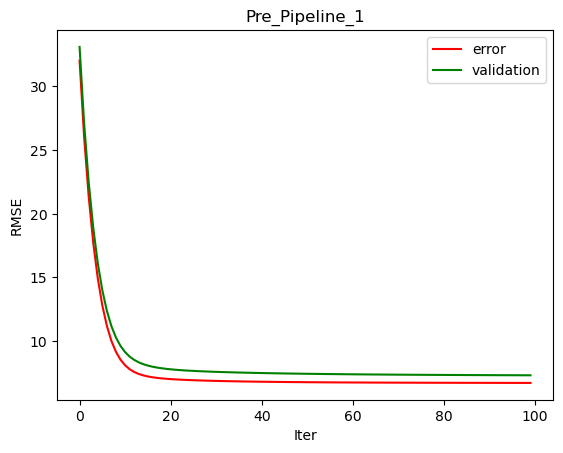

In [343]:
# Error and Validation Curves for Pre_Pipeline_1
Batch_1 = Batch_Gradient_descent(learning_rate = Batch[0][0])
Batch_1.fit(train_prepared_1,train_labels_1)
plt.plot(Batch_1.error, color='r', label='error')
plt.plot(Batch_1.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_1")
plt.legend()
plt.show()

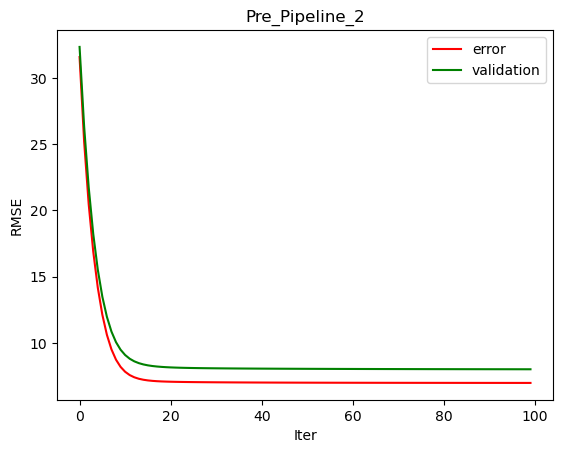

In [344]:
# Error and Validation Curves for Pre_Pipeline_2
Batch_2 = Batch_Gradient_descent(learning_rate = Batch[0][1])
Batch_2.fit(train_prepared_2,train_labels_2)
plt.plot(Batch_2.error, color='r', label='error')
plt.plot(Batch_2.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_2")
plt.legend()
plt.show()

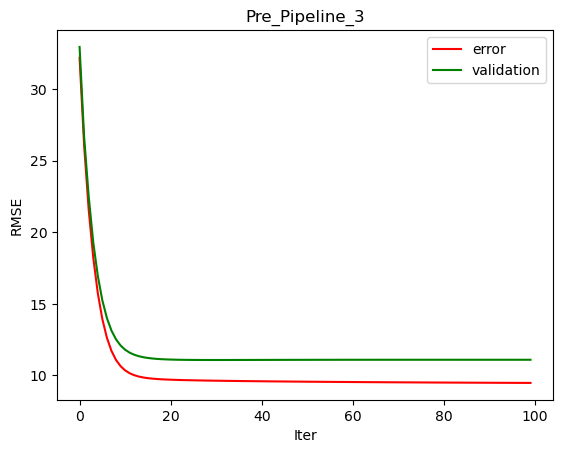

In [345]:
# Error and Validation Curves for Pre_Pipeline_3
Batch_3 = Batch_Gradient_descent(learning_rate = Batch[0][2])
Batch_3.fit(train_prepared_3,train_labels_3)
plt.plot(Batch_3.error, color='r', label='error')
plt.plot(Batch_3.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_3")
plt.legend()
plt.show()

In [346]:
print(f"""
Batch_Gradient_Descent
Pre_Pipeline_1 : {Batch[1][0]}
Pre_Pipeline_2 : {Batch[1][1]}
Pre_Pipeline_3 : {Batch[1][2]}""")


Batch_Gradient_Descent
Pre_Pipeline_1 : 7.188341962397362
Pre_Pipeline_2 : 7.476490192632443
Pre_Pipeline_3 : 10.141626518337906


### Mini-batch Gradient Descent

In [347]:
class Mini_Batch_Gradient_descent:
    def __init__(self, learning_rate=0.01, iters=100, seed=45, batch_size=32):
        self.learning_rate = learning_rate
        self.iters = iters
        self.seed = seed
        self.batch_size = batch_size

    def fit(self,X,y):
        X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=45)
        ones = np.ones(X_train.shape[0]).reshape(-1,1)
        X_train = np.column_stack((ones, X_train))
        ones = np.ones(X_val.shape[0]).reshape(-1,1)
        X_val = np.column_stack((ones, X_val))
        #initializing random weights for the given seed 
        np.random.seed(self.seed)
        w = np.random.randn(X_train.shape[1])
        self.error = []
        self.val = []
        for i in range(self.iters):
            # To generate random indices
            row_indices = np.random.choice(X_train.shape[0], self.batch_size, replace=False)
            X_batch = X_train[row_indices].copy()
            y_batch = y_train[row_indices].copy()
            w = w - self.learning_rate * (2 / len(y_batch)) * X_batch.T @ (X_batch @ w - y_batch)
            self.error.append(mean_squared_error(y_train, X_train @ w, squared=False))
            self.val.append(mean_squared_error(y_val, X_val @ w, squared=False))
        self.parameter = w
        return self
    
    def predict(self,X):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        return X @ self.parameter

In [348]:
# Hyper Parameter Tuning
def Hyper_Parameter_Tuning_Mini():
    lamda = [0.0001, 0.001,0.01, 0.1]
    size  = [32, 64, 128, 256]
    # For Pre_Pipeline_1
    RMSE_1 = []
    parms_1 = []
    for i in lamda:
        for j in size:
            m1 = Mini_Batch_Gradient_descent(learning_rate = i,batch_size = j)
            m1.fit(train_prepared_1,train_labels_1)
            linear_rmse = mean_squared_error(test_labels_1, m1.predict(test_prepared_1), squared=False)
            RMSE_1.append(linear_rmse)
            parms_1.append((i,j))
    best_parms_1 = parms_1[RMSE_1.index(min(RMSE_1))]
    
    # For Pre_Pipeline_2
    RMSE_2 = []
    parms_2 = []
    for i in lamda:
        for j in size:
            m2 = Mini_Batch_Gradient_descent(learning_rate = i,batch_size = j)
            m2.fit(train_prepared_2,train_labels_2)
            linear_rmse = mean_squared_error(test_labels_2, m2.predict(test_prepared_2), squared=False)
            RMSE_2.append(linear_rmse)
            parms_2.append((i,j))
    best_parms_2 = parms_2[RMSE_2.index(min(RMSE_2))]
    
    # For Pre_Pipeline_3
    RMSE_3 = []
    parms_3 = []
    for i in lamda:
        for j in size:
            m3 = Mini_Batch_Gradient_descent(learning_rate = i,batch_size = j)
            m3.fit(train_prepared_3,train_labels_3)
            linear_rmse = mean_squared_error(test_labels_3, m3.predict(test_prepared_3), squared=False)
            RMSE_3.append(linear_rmse)
            parms_3.append((i,j))
    best_parms_3 = parms_3[RMSE_3.index(min(RMSE_3))]
    
    return [[best_parms_1,best_parms_2,best_parms_3],[min(RMSE_1),min(RMSE_2),min(RMSE_3)]]

In [349]:
Mini = Hyper_Parameter_Tuning_Mini()

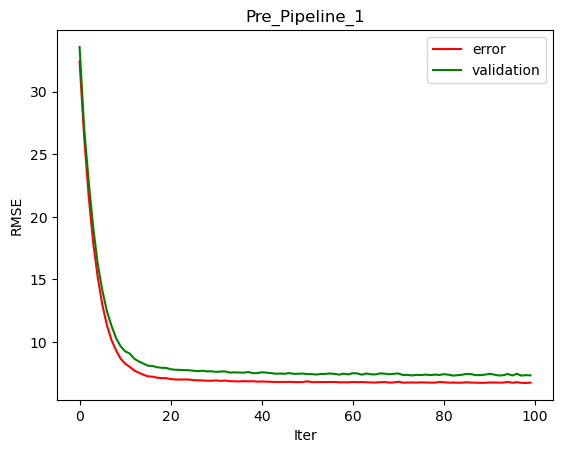

In [350]:
# Error and Validation Curves for Pre_Pipeline_1
Mini_1 = Mini_Batch_Gradient_descent(learning_rate = Mini[0][0][0],batch_size = Mini[0][0][1])
Mini_1.fit(train_prepared_1,train_labels_1)
plt.plot(Mini_1.error, color='r', label='error')
plt.plot(Mini_1.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_1")
plt.legend()
plt.show()

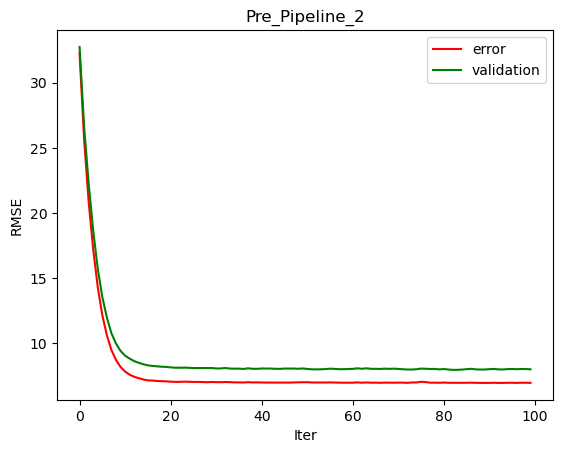

In [351]:
# Error and Validation Curves for Pre_Pipeline_2
Mini_2 = Mini_Batch_Gradient_descent(learning_rate = Mini[0][1][0],batch_size = Mini[0][1][1])
Mini_2.fit(train_prepared_2,train_labels_2)
plt.plot(Mini_2.error, color='r', label='error')
plt.plot(Mini_2.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_2")
plt.legend()
plt.show()

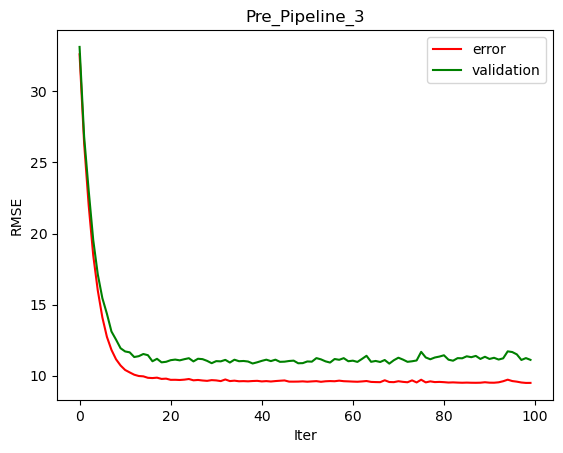

In [352]:
# Error and Validation Curves for Pre_Pipeline_3
Mini_3 = Mini_Batch_Gradient_descent(learning_rate = Mini[0][2][0],batch_size = Mini[0][2][1])
Mini_3.fit(train_prepared_3,train_labels_3)
plt.plot(Mini_3.error, color='r', label='error')
plt.plot(Mini_3.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_3")
plt.legend()
plt.show()

In [353]:
print(f"""
Mini_Batch_Gradient_Descent
Pre_Pipeline_1 : {Mini[1][0]}
Pre_Pipeline_2 : {Mini[1][1]}
Pre_Pipeline_3 : {Mini[1][2]}""")


Mini_Batch_Gradient_Descent
Pre_Pipeline_1 : 7.204781748381083
Pre_Pipeline_2 : 7.457321017474849
Pre_Pipeline_3 : 10.138361953927225


### Stochastic Gradient Descent

In [354]:
class Stochastic_Gradient_descent:
    def __init__(self, learning_rate=0.01, iters=500, seed=45):
        self.learning_rate = learning_rate
        self.iters = iters
        self.seed = seed
        self.batch_size = 1

    def fit(self,X,y):
        X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=45)
        ones = np.ones(X_train.shape[0]).reshape(-1,1)
        X_train = np.column_stack((ones, X_train))
        ones = np.ones(X_val.shape[0]).reshape(-1,1)
        X_val = np.column_stack((ones, X_val))
        #initializing random weights for the given seed 
        np.random.seed(self.seed)
        w = np.random.randn(X_train.shape[1])
        self.error = []
        self.val = []
        for i in range(self.iters):
            # To generate random indices
            row_indices = np.random.choice(X_train.shape[0], self.batch_size, replace=False)
            X_batch = X_train[row_indices].copy()
            y_batch = y_train[row_indices].copy()
            w = w - self.learning_rate * (2 / len(y_batch)) * X_batch.T @ (X_batch @ w - y_batch)
            self.error.append(mean_squared_error(y_train, X_train @ w, squared=False))
            self.val.append(mean_squared_error(y_val, X_val @ w, squared=False))
        self.parameter = w
        return self
    
    def predict(self,X):
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.column_stack((ones, X))
        return X @ self.parameter

In [355]:
# Hyper Parameter Tuning
def Hyper_Parameter_Tuning_Stochastic():
    lamda = [0.0001, 0.001,0.01, 0.1]
    # For Pre_Pipeline_1
    RMSE_1 = []
    for i in lamda:
        m1 = Stochastic_Gradient_descent(learning_rate = i)
        m1.fit(train_prepared_1,train_labels_1)
        linear_rmse = mean_squared_error(test_labels_1, m1.predict(test_prepared_1), squared=False)
        RMSE_1.append(linear_rmse)
    best_lamda_1 = lamda[RMSE_1.index(min(RMSE_1))]
    
    # For Pre_Pipeline_2
    RMSE_2 = []
    for i in lamda:
        m2 = Stochastic_Gradient_descent(learning_rate = i)
        m2.fit(train_prepared_2,train_labels_2)
        linear_rmse = mean_squared_error(test_labels_2, m2.predict(test_prepared_2), squared=False)
        RMSE_2.append(linear_rmse)
    best_lamda_2 = lamda[RMSE_2.index(min(RMSE_2))]
    
    # For Pre_Pipeline_3
    RMSE_3 = []
    for i in lamda:
        m3 = Stochastic_Gradient_descent(learning_rate = i)
        m3.fit(train_prepared_3,train_labels_3)
        linear_rmse = mean_squared_error(test_labels_3, m3.predict(test_prepared_3), squared=False)
        RMSE_3.append(linear_rmse)
    best_lamda_3 = lamda[RMSE_3.index(min(RMSE_3))]
    
    return [[best_lamda_1,best_lamda_2,best_lamda_3],[min(RMSE_1),min(RMSE_2),min(RMSE_3)]]

In [356]:
Stochastic = Hyper_Parameter_Tuning_Stochastic()

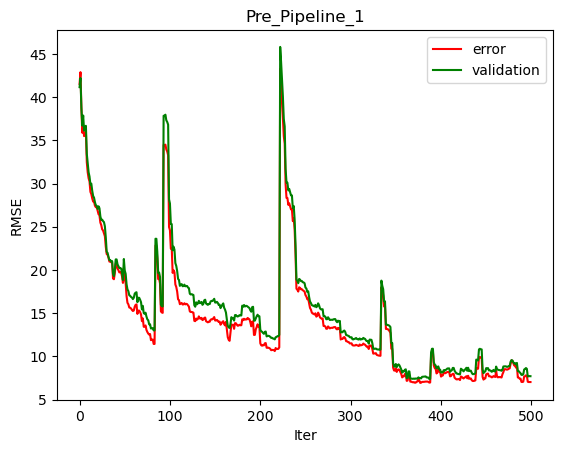

In [357]:
# Error and Validation Curves for Pre_Pipeline_1
Stochastic_1 = Stochastic_Gradient_descent(learning_rate = Stochastic[0][0])
Stochastic_1.fit(train_prepared_1,train_labels_1)
plt.plot(Stochastic_1.error, color='r', label='error')
plt.plot(Stochastic_1.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_1")
plt.legend()
plt.show()

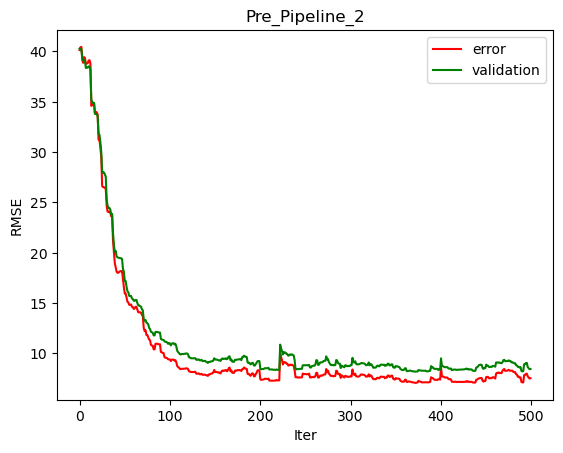

In [358]:
# Error and Validation Curves for Pre_Pipeline_2
Stochastic_2 = Stochastic_Gradient_descent(learning_rate = Stochastic[0][1])
Stochastic_2.fit(train_prepared_2,train_labels_2)
plt.plot(Stochastic_2.error, color='r', label='error')
plt.plot(Stochastic_2.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_2")
plt.legend()
plt.show()

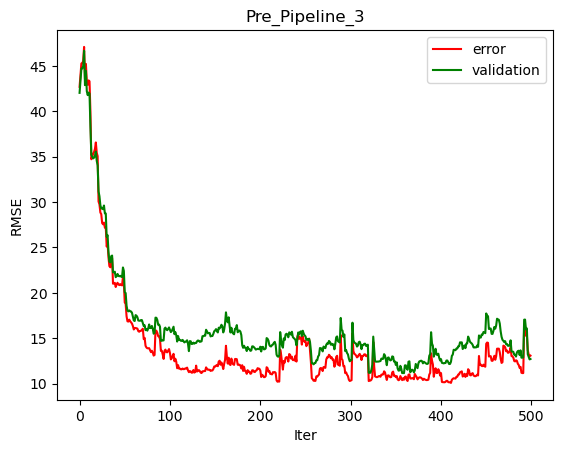

In [359]:
# Error and Validation Curves for Pre_Pipeline_3
Stochastic_3 = Stochastic_Gradient_descent(learning_rate = Stochastic[0][2])
Stochastic_3.fit(train_prepared_3,train_labels_3)
plt.plot(Stochastic_3.error, color='r', label='error')
plt.plot(Stochastic_3.val, color='g', label='validation')
plt.xlabel("Iter")
plt.ylabel("RMSE")
plt.title("Pre_Pipeline_3")
plt.legend()
plt.show()

In [360]:
print(f"""
Stochastic_Gradient_Descent
Pre_Pipeline_1 : {Stochastic[1][0]}
Pre_Pipeline_2 : {Stochastic[1][1]}
Pre_Pipeline_3 : {Stochastic[1][2]}""")


Stochastic_Gradient_Descent
Pre_Pipeline_1 : 7.611888947436068
Pre_Pipeline_2 : 7.6612133651091705
Pre_Pipeline_3 : 11.598776699769438


# PART(5):KNN

In [361]:
class K_nearest_neighbours:
    def __init__(self,k=3):
        self.k = k
    
    def predict(self,X,y,x):
        values = np.array([])
        for i in range(x.shape[0]):
            stacked_arr = np.vstack(np.repeat([x[i]],X.shape[0] , axis=0))
            difference = X - stacked_arr
            difference = difference**2
            euclidan_distance = np.sqrt(difference @ np.ones(X.shape[1]).reshape(-1,1))
            weights = np.hstack((euclidan_distance,y.reshape(-1,1)))
            weights = weights[weights[:, 0].argsort()]
            value,_= np.vsplit(weights,[self.k])
            value[:,0]=1/value[:,0]
            value[:,1]=value[:,0]*value[:,1]
            values = np.append(values,np.sum(value[:,1])/np.sum(value[:,0]))
        return values

In [362]:
def Hyper_Parameter_Tuning_KNN():
    N = [1,2,3,4,5,6,7,8,9,10]
    # For Pre_Pipleine_1
    RMSE_1 = []
    RMSE_2 = []
    RMSE_3 = []
    for i in N:
        K_1 = K_nearest_neighbours(i)
        K_2 = K_nearest_neighbours(i)
        K_3 = K_nearest_neighbours(i)
        RMSE_1.append(mean_squared_error(test_labels_1, K_1.predict(train_prepared_1,train_labels_1,test_prepared_1), squared=False))
        RMSE_2.append(mean_squared_error(test_labels_2, K_2.predict(train_prepared_2,train_labels_2,test_prepared_2), squared=False))
        RMSE_3.append(mean_squared_error(test_labels_3, K_3.predict(train_prepared_3,train_labels_3,test_prepared_3), squared=False))
    return [RMSE_1,RMSE_2,RMSE_3]

In [363]:
KNN = Hyper_Parameter_Tuning_KNN()

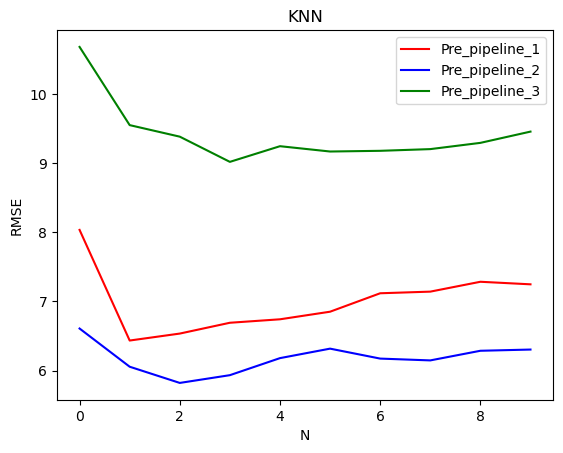

In [364]:
plt.plot(KNN[0],color='r', label='Pre_pipeline_1')
plt.plot(KNN[1],color='b', label='Pre_pipeline_2')
plt.plot(KNN[2],color='g', label='Pre_pipeline_3')
plt.xlabel("N")
plt.ylabel("RMSE")
plt.title("KNN")
plt.legend()
plt.show()

It can be seen that as k value increases initially RMSE decreases then it increases 

In [365]:
print(f"""
KNN
Pre_Pipeline_1 : {min(KNN[0])}
Pre_Pipeline_2 : {min(KNN[1])}
Pre_Pipeline_3 : {min(KNN[2])}""")


KNN
Pre_Pipeline_1 : 6.435666901989458
Pre_Pipeline_2 : 5.823051393865772
Pre_Pipeline_3 : 9.01801628925626


### Pros of K-nearest neighbors: 
Non-Parametric: K-NN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution 

Adaptable to New Data: K-NN can adapt quickly to new data points without the need for retraining, making it suitable for dynamic or changing datasets 

No Training Time: Unlike many other machine learning algorithms that require extensive training on the dataset, K-NN doesn't have a training phase. The algorithm simply stores the training data for later use.

### Cons of K-nearest neighbors: 
Storage Requirements: K-NN needs to store the entire training dataset, which can be memory-intensive for large datasets 

Computational Complexity: K-NN can be computationally expensive, especially when dealing with large datasets, as it requires calculating the distance between the query point and all data points in the training set. 

K-Value Selection: Selecting the value of K (the number of neighbors to consider) can be challenging. A small K may lead to noisy predictions, while a large K can result in overly smooth decision boundaries.


# PART(6):GLM

As the data has only positive values we can assume the data to be poisson distribution , gamma distribution, Inverse Gaussian distribution (or even higher variance powers of the Tweedie family).

In [366]:
from sklearn.linear_model import PoissonRegressor,TweedieRegressor,GammaRegressor

In [367]:
# For PoissonRegressor
Output(PoissonRegressor)

<class 'sklearn.linear_model._glm.glm.PoissonRegressor'>
 Pre_Pipeline_1 : 8.32815936217251
 Pre_Pipeline_2 : 8.758238804229455
 Pre_Pipeline_3 : 10.655872074017534



In [368]:
# For PoissonRegressor
Output(GammaRegressor)

<class 'sklearn.linear_model._glm.glm.GammaRegressor'>
 Pre_Pipeline_1 : 10.512601983337355
 Pre_Pipeline_2 : 9.618147315036234
 Pre_Pipeline_3 : 12.07524521725933



In [369]:
# For PoissonRegressor
Output(TweedieRegressor)

<class 'sklearn.linear_model._glm.glm.TweedieRegressor'>
 Pre_Pipeline_1 : 10.42543088276919
 Pre_Pipeline_2 : 9.527235274650351
 Pre_Pipeline_3 : 11.816586763565251



From the analysis we can choose Pre_Pipeline_2 with KNN with N value 3 as the final model

# Test Output

In [370]:
data_Output = data_test.copy()
data_Output.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,material_strength
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,NaN
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,NaN
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,NaN
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3,NaN
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,NaN


In [371]:
# Dropping the material_strength column
data_Output = data_Output.drop("material_strength", axis=1)
data_Prepared_Output = pre_pipeline_2.fit_transform(data_Output)

In [372]:
# Preparing data for final Model
data_train = data.copy()
train_features = data_train.drop("Material Strength", axis=1)
train_labels = data_train["Material Strength"].copy()
train_prepared = pre_pipeline_2.fit_transform(train_features)
train_labels = np.array(train_labels)

In [373]:
# Training the Final Model
Final_Model = K_nearest_neighbours(3)
OUTPUT = Final_Model.predict(train_prepared,train_labels,data_Prepared_Output)

In [374]:
pd.DataFrame(OUTPUT).to_csv("12040890_Mohammad Sameer_Asg1.csv",index=False,header=False)

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
predicted = pd.read_csv("./12040890_Mohammad Sameer_Asg1.csv",header=None)
actual = pd.read_csv("./concrete_data_Solution.csv",header=None)
# MSE
print("MSE",mean_squared_error(y_true=actual[0],y_pred=predicted[0]))
# MAPE
print("MAPE",mean_absolute_percentage_error(y_true=actual[0],y_pred=predicted[0]) * 100)
# MAE
print("MAE",mean_absolute_error(y_true=actual[0],y_pred=predicted[0]))

MSE 193.3170212715604
MAPE 46.11494744880312
MAE 11.243158153875708
